In [1]:
import nltk
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, SnowballStemmer, WordNetLemmatizer
from nltk import pos_tag, ne_chunk
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-dat

True

In [2]:
#task1

text = """Skill Share students are learning Natural Language Processing in Hyderabad.
Rohit teaches NLP with clarity, examples, and real-world scenarios.
Many learners from Chennai and Trivandrum attend these sessions to improve their AI and ML skills."""

# Sentence Tokenization
sentences = sent_tokenize(text)

# Word Tokenization
words = word_tokenize(text)

# Counts
total_sentences = len(sentences)
total_words = len(words)
unique_words = len(set(words))



print("sentences:",sentences)
print("words:",words)
print("Total sentences",total_sentences)
print("Total words",total_words)
print("unique words",unique_words)





sentences: ['Skill Share students are learning Natural Language Processing in Hyderabad.', 'Rohit teaches NLP with clarity, examples, and real-world scenarios.', 'Many learners from Chennai and Trivandrum attend these sessions to improve their AI and ML skills.']
words: ['Skill', 'Share', 'students', 'are', 'learning', 'Natural', 'Language', 'Processing', 'in', 'Hyderabad', '.', 'Rohit', 'teaches', 'NLP', 'with', 'clarity', ',', 'examples', ',', 'and', 'real-world', 'scenarios', '.', 'Many', 'learners', 'from', 'Chennai', 'and', 'Trivandrum', 'attend', 'these', 'sessions', 'to', 'improve', 'their', 'AI', 'and', 'ML', 'skills', '.']
Total sentences 3
Total words 40
unique words 35


In [3]:
#task2

stop_words = set(stopwords.words('english'))

removed_stopwords = [w for w in words if w.lower() in stop_words]
filtered_words = [w for w in words if w.lower() not in stop_words]

reduction_percent = ((len(words) - len(filtered_words)) / len(words)) * 100

print("removed stopwords:" ,removed_stopwords) 
print("filtered_words:", filtered_words)
print("reduction_percent:",reduction_percent)


removed stopwords: ['are', 'in', 'with', 'and', 'from', 'and', 'these', 'to', 'their', 'and']
filtered_words: ['Skill', 'Share', 'students', 'learning', 'Natural', 'Language', 'Processing', 'Hyderabad', '.', 'Rohit', 'teaches', 'NLP', 'clarity', ',', 'examples', ',', 'real-world', 'scenarios', '.', 'Many', 'learners', 'Chennai', 'Trivandrum', 'attend', 'sessions', 'improve', 'AI', 'ML', 'skills', '.']
reduction_percent: 25.0


In [4]:
#task3

porter = PorterStemmer()
snowball = SnowballStemmer("english")

sample_words = ["learning", "teaches", "scenarios", "improving"]

porter_output = [porter.stem(w) for w in sample_words]
snowball_output = [snowball.stem(w) for w in sample_words]

list(zip(sample_words, porter_output, snowball_output))


#Porter stemmer is older and cuts words more aggressively.
#Snowball stemmer is an improved version that gives cleaner and more accurate stems.
#Snowball handles more rules and languages better than Porter.
#Overall, Snowball is more consistent and preferred in modern NLP tasks.#


[('learning', 'learn', 'learn'),
 ('teaches', 'teach', 'teach'),
 ('scenarios', 'scenario', 'scenario'),
 ('improving', 'improv', 'improv')]

In [5]:
#task4

lemm = WordNetLemmatizer()

# Basic Lemmatization
basic_lemma = [lemm.lemmatize(w) for w in filtered_words]

# POS-based Lemmatization
def get_pos(word):
    tag = pos_tag([word])[0][1][0].upper()
    pos_dict = {'J':'a','N':'n','V':'v','R':'r'}
    return pos_dict.get(tag, 'n')

pos_lemma = [lemm.lemmatize(w, get_pos(w)) for w in filtered_words]

print(basic_lemma)
print(pos_lemma)

#Lemmatization returns the actual dictionary root word, not just a cut or chopped version like stemming.
#It understands the grammar (POS tags) of a word, so it chooses the correct base form (e.g., better → good).
#It uses linguistic rules and vocabulary, which makes the output meaningful.
#It avoids incorrect or incomplete roots that stemmers often produce.
#Because of this, lemmatization produces more accurate, clean, and useful words for NLP models.

['Skill', 'Share', 'student', 'learning', 'Natural', 'Language', 'Processing', 'Hyderabad', '.', 'Rohit', 'teach', 'NLP', 'clarity', ',', 'example', ',', 'real-world', 'scenario', '.', 'Many', 'learner', 'Chennai', 'Trivandrum', 'attend', 'session', 'improve', 'AI', 'ML', 'skill', '.']
['Skill', 'Share', 'student', 'learn', 'Natural', 'Language', 'Processing', 'Hyderabad', '.', 'Rohit', 'teach', 'NLP', 'clarity', ',', 'example', ',', 'real-world', 'scenario', '.', 'Many', 'learner', 'Chennai', 'Trivandrum', 'attend', 'session', 'improve', 'AI', 'ML', 'skill', '.']


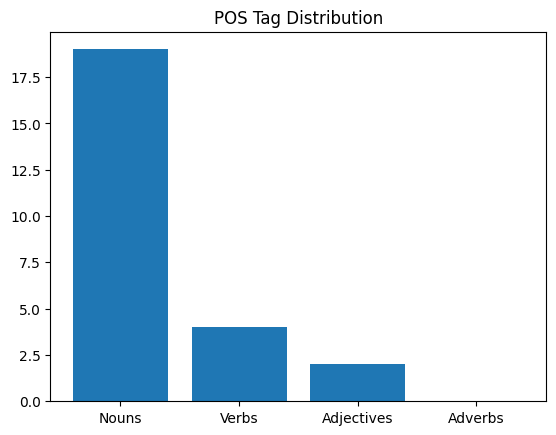

['Skill', 'Share', 'students', 'Natural', 'Language', 'Processing', 'Hyderabad', 'Rohit', 'NLP', 'clarity', 'examples', 'scenarios', 'learners', 'Chennai', 'Trivandrum', 'sessions', 'AI', 'ML', 'skills']
['learning', 'teaches', 'attend', 'improve']
['real-world', 'Many']
[]


In [6]:
#task5

pos_tags = pos_tag(filtered_words)

nouns = [w for w, t in pos_tags if t.startswith('N')]
verbs = [w for w, t in pos_tags if t.startswith('V')]
adjectives = [w for w, t in pos_tags if t.startswith('J')]
adverbs = [w for w, t in pos_tags if t.startswith('R')]

counts = [len(nouns), len(verbs), len(adjectives), len(adverbs)]

plt.bar(["Nouns", "Verbs", "Adjectives", "Adverbs"], counts)
plt.title("POS Tag Distribution")
plt.show()

print(nouns)
print(verbs)
print(adjectives)
print(adverbs)


In [7]:
#task6

ner_tree = ne_chunk(pos_tags)

persons = []
gpes = []
orgs = []

for chunk in ner_tree:
    if hasattr(chunk, 'label'):
        if chunk.label() == 'PERSON':
            persons.append(' '.join(c[0] for c in chunk))
        elif chunk.label() == 'GPE':
            gpes.append(' '.join(c[0] for c in chunk))
        elif chunk.label() == 'ORGANIZATION':
            orgs.append(' '.join(c[0] for c in chunk))

print(persons)
print(gpes)
print(orgs)


['Skill', 'Rohit', 'Chennai Trivandrum']
[]
['Share', 'Natural Language', 'NLP', 'AI']


In [8]:
#task7
vectorizer = CountVectorizer()
bow_matrix = vectorizer.fit_transform(sentences)

vocab = vectorizer.get_feature_names_out()
bow_df = bow_matrix.toarray()

vocab, bow_df


(array(['ai', 'and', 'are', 'attend', 'chennai', 'clarity', 'examples',
        'from', 'hyderabad', 'improve', 'in', 'language', 'learners',
        'learning', 'many', 'ml', 'natural', 'nlp', 'processing', 'real',
        'rohit', 'scenarios', 'sessions', 'share', 'skill', 'skills',
        'students', 'teaches', 'their', 'these', 'to', 'trivandrum',
        'with', 'world'], dtype=object),
 array([[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
         0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
         0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1],
        [1, 2, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
         1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0]]))

In [9]:
import numpy as np

word_counts = np.sum(bow_df, axis=0)
top_indices = word_counts.argsort()[-5:][::-1]

top_words = [(vocab[i], word_counts[i]) for i in top_indices]
print(top_words)

[('and', np.int64(3)), ('world', np.int64(1)), ('with', np.int64(1)), ('trivandrum', np.int64(1)), ('these', np.int64(1))]


In [10]:
#task8
from nltk.util import ngrams

unigrams = list(ngrams(words, 1))
bigrams = list(ngrams(words, 2))
trigrams = list(ngrams(words, 3))

print(unigrams[:10])
print(bigrams[:10])
print(trigrams[:10])

'''Unigrams consider each word separately, so they lose context and cannot understand relationships between words.
   Bigrams capture two-word combinations, which help identify meaningful phrases like “machine learning” or “natural language.”
   Trigrams capture three-word patterns, giving even deeper context and better understanding of sentence structure.'''


[('Skill',), ('Share',), ('students',), ('are',), ('learning',), ('Natural',), ('Language',), ('Processing',), ('in',), ('Hyderabad',)]
[('Skill', 'Share'), ('Share', 'students'), ('students', 'are'), ('are', 'learning'), ('learning', 'Natural'), ('Natural', 'Language'), ('Language', 'Processing'), ('Processing', 'in'), ('in', 'Hyderabad'), ('Hyderabad', '.')]
[('Skill', 'Share', 'students'), ('Share', 'students', 'are'), ('students', 'are', 'learning'), ('are', 'learning', 'Natural'), ('learning', 'Natural', 'Language'), ('Natural', 'Language', 'Processing'), ('Language', 'Processing', 'in'), ('Processing', 'in', 'Hyderabad'), ('in', 'Hyderabad', '.'), ('Hyderabad', '.', 'Rohit')]


'Unigrams consider each word separately, so they lose context and cannot understand relationships between words.\n   Bigrams capture two-word combinations, which help identify meaningful phrases like “machine learning” or “natural language.”\n   Trigrams capture three-word patterns, giving even deeper context and better understanding of sentence structure.'

In [11]:
#task9
'''These preprocessing techniques help build a student feedback sentiment analyzer by converting raw text into structured data. 
   Tokenization breaks feedback into words and sentences for easy analysis. Stopword removal eliminates unnecessary words, making the text clean. 
   Stemming and lemmatization bring words to their root forms and reduce vocabulary size. POS tagging identifies sentiment-bearing words like adjectives. 
   NER helps detect instructor names and cities. Bag-of-Words and N-Grams convert sentences into numerical features. 
   These features can then be passed into ML models like Logistic Regression, SVM, or BERT to classify feedback as positive, neutral, or negative.'''


'These preprocessing techniques help build a student feedback sentiment analyzer by converting raw text into structured data. \n   Tokenization breaks feedback into words and sentences for easy analysis. Stopword removal eliminates unnecessary words, making the text clean. \n   Stemming and lemmatization bring words to their root forms and reduce vocabulary size. POS tagging identifies sentiment-bearing words like adjectives. \n   NER helps detect instructor names and cities. Bag-of-Words and N-Grams convert sentences into numerical features. \n   These features can then be passed into ML models like Logistic Regression, SVM, or BERT to classify feedback as positive, neutral, or negative.'